# NACHOS12.L75-GADAscal

__creation__ : 08/06/2017

__purpose__ : same as [NACHOS12.L75-scal](2017-05-09-AA-NACHOS12.L75-scal.html) with GLORYS2V4 inputs and BDY, namelist from EORCA12-MJMgd16

__outcome__ : optimal choice for ada : 

## We want to find the most efficient number of processors for NACHOS12

  - on ada :
    - in NACHOS12.L75-GADAscal, dcm_mktools.ksh -n MPP_PREP  -c ACHOS12.L75-GADAscal
    - copy MPP_PREP in /workgpfs/rech/ote/rote001/DEV/
    - link NACHOS12.L75_bathymetry_20S_80N_nfrontiercleaned_repeat3_retouchbalt.nc, modify namelist cn_fbathy and nn_procmax = 3000
    - run mpp_optimize.exe -f namelist => processor.layout
    - we want to test NACHOS to run with 500 to 2000 processors, this [script](find_best_procs_ada.ksh) help us select the best cutting, results in [here](best_ada.txt)
    - we complete this info with calculation of number of procs reserved for xios (see below) => procs_xios_ada.txt
  - on occigen :
    - includefile.ksh, namelist and NACHOS12.L75-scal_occigen.ksh have been adapted to a multiple launch : mkmetasub.ksh, metasub.ksh

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
procs=np.loadtxt('best_ada.txt')
jpni=procs[:,0]
jpnj=procs[:,1]
jpi=procs[:,2]
jpj=procs[:,3]
jpijpj=procs[:,4]
proc=procs[:,5]
elim=procs[:,6]
sup=procs[:,7]
xios=0*proc
xios=(np.floor(proc/32)+1)*32-proc
xios[np.where(xios<10)]=xios[np.where(xios<10)]+32
possible_choice=np.zeros((49,9))
possible_choice[:,0:8]=procs[:]
possible_choice[:,8]=xios[:]
np.savetxt('procs_xios_ada.txt', possible_choice,fmt='%i', delimiter=' ')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
procs=np.loadtxt('best_ada_bis.txt')
jpni=procs[:,0]
jpnj=procs[:,1]
jpi=procs[:,2]
jpj=procs[:,3]
jpijpj=procs[:,4]
proc=procs[:,5]
elim=procs[:,6]
sup=procs[:,7]
xios=0*proc
xios=(np.floor(proc/32)+1)*32-proc
xios[np.where(xios<19)]=xios[np.where(xios<10)]+32
possible_choice=np.zeros((69,9))
possible_choice[:,0:8]=procs[:]
possible_choice[:,8]=xios[:]
np.savetxt('procs_xios_ada_bis.txt', possible_choice,fmt='%i', delimiter=' ')

/home/albert/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


## Results 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/home/users/albert6a/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


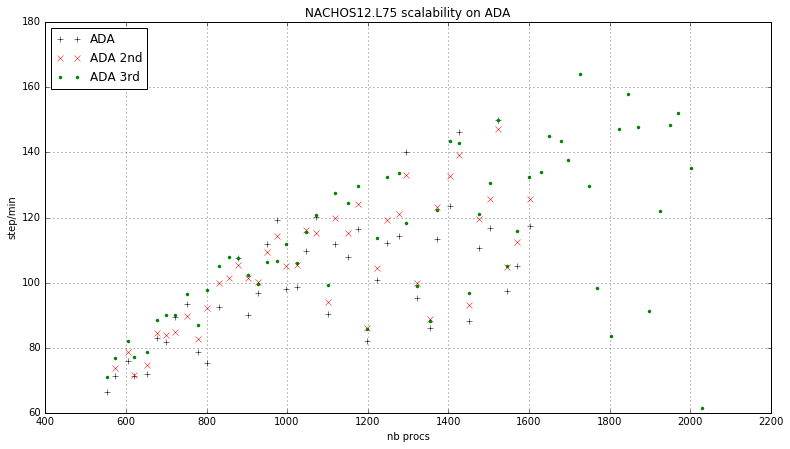

In [4]:
results=np.loadtxt('results_ada.txt')
results2=np.loadtxt('results2_ada.txt')
results3=np.loadtxt('results3_ada.txt')
x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]
x3=results3[:,0]
y3=results3[:,1]

fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.plot(x3,y3,'g.')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.legend(['ADA','ADA 2nd','ADA 3rd'],loc=2)
plt.grid()
plt.title('NACHOS12.L75 scalability on ADA')
#plt.savefig('/media/extra/DATA/NACHOS12/PLOTS/scalability_ada.png')

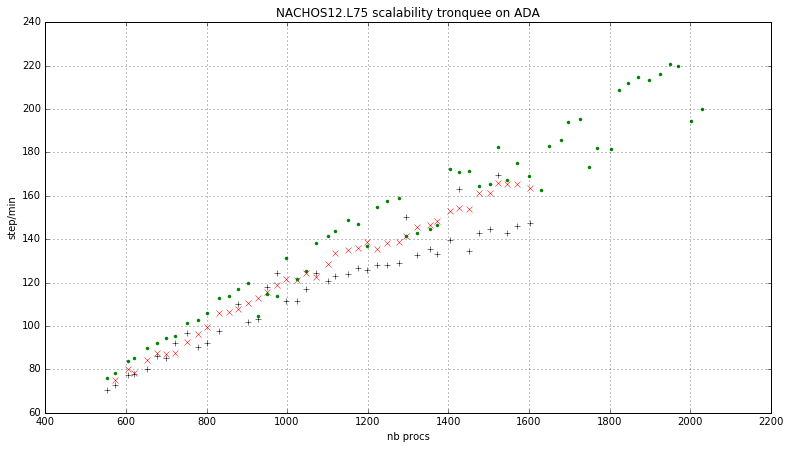

In [5]:
results=np.loadtxt('results_tronc2_ada.txt')
results2=np.loadtxt('results2_tronc2_ada.txt')
results3=np.loadtxt('results3_tronc_ada.txt')

x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]
x3=results3[:,0]
y3=results3[:,1]

fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.plot(x3,y3,'g.')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.grid()
plt.title('NACHOS12.L75 scalability tronquee on ADA')
#plt.savefig('scalability_tronc_ada.png')

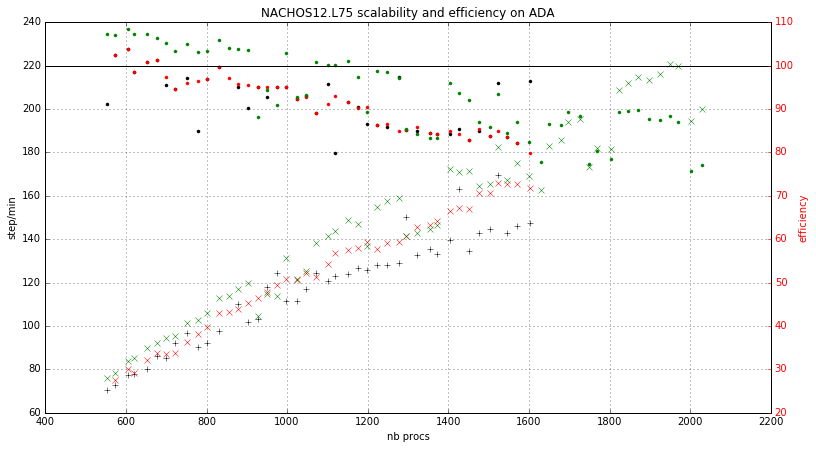

In [8]:
results1=np.loadtxt('results_tronc2_ada.txt')
results2=np.loadtxt('results2_tronc2_ada.txt')
results3=np.loadtxt('results3_tronc_ada.txt')

x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]
x3=results3[:,0]
y3=results3[:,1]


fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.plot(x3,y3,'gx')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.grid()

ax2 = ax.twinx()
yeff=0*y
yeff2=0*y2
yeff3=0*y3

for i in np.arange(0,len(x3)):
    yeff3[i]=y3[i]*100/(x3[i]*77.4/604)
for i in np.arange(0,len(x2)):
    yeff2[i]=y2[i]*100/(x2[i]*77.4/604)
for i in np.arange(0,len(x2)):
    yeff[i]=y2[i]*100/(x2[i]*77.4/604)
   
ax2.plot(x,yeff,'k.')
ax2.plot(x2,yeff2,'r.')
ax2.plot(x3,yeff3,'g.')
ax2.axhline(y=100,color='k')
ax2.set_ylim([20,110])
ax2.set_ylabel('efficiency', color='r')
ax2.tick_params('y', colors='r')

plt.title('NACHOS12.L75 scalability and efficiency on ADA')
#plt.savefig('scalability_efficiency_tronc_ada.png')


